# Q-learning

One of the most well-known algorithms used in reinforcement learning is Q-learning. Q-learning is an RL technique used for learning the optimal policy in a Markov decision process. Q-learning strives to find the optimal policy by learning the optimal Q-value in each state-action pair. The algorithm iteratively updates the Q-values in its Q-table for every state-action pair using the Bellman optimality equation. It does so until the Q-values nearly converges to the optimal Q-function. Initially, the Q-table for every state-action pair is initialized to zero. This is because the agent does not know anything about the environment at the start of an episode. We define a sequence of states, actions, and rewards, which ends in a terminal condition as an episode. The Q-values will be iteratively updated during various episodes using this value iteration method. After each episode, the Q-table will slowly converge to the optimal Q-value. The agent can make better decisions during episodes in every state based on the Q-table's highest values for that state.

We test our algorithm on the **frozen lake** environment from OpenAI Gym. The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile.

**References:**
- https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf
- https://deeplizard.com/resources
- https://gym.openai.com/envs/FrozenLake-v0/

## Import Libraries

In [1]:
import gym
import random
import numpy as np

from ipynb.fs.full.Plotting import *
import matplotlib.pyplot as plt

In [2]:
random.seed(2021)

## Reinforcement Learning Agent

In [3]:
class Agent():
    def __init__(self, observation_space, action_space, learning_rate = 0.1, discount_rate = 0.99, exploration_rate = 1.0, 
                 max_exploration_rate = 1, min_exploration_rate = 0.01, exploration_decay_rate = 0.001):
        
        self.episode = 0
        
        self.observation_space = observation_space
        self.action_space = action_space
        
        self.learning_rate = learning_rate
        self.discount_rate = discount_rate

        self.exploration_rate = exploration_rate
        self.max_exploration_rate = max_exploration_rate
        self.min_exploration_rate = min_exploration_rate
        self.exploration_decay_rate = exploration_decay_rate
        
        self.Q = np.zeros((self.observation_space, self.action_space))
        
    def choice_action(self, observation):
        exploration_rate_threshold = np.random.random()
        if exploration_rate_threshold > self.exploration_rate:
            action = np.argmax(self.Q[observation,:]) # Best Q-value for action in state.
        else:
            action = np.random.choice(self.action_space)
            
        return action
        
    def decrease_exploration_rate(self):
        self.exploration_rate = self.min_exploration_rate + \
            (self.max_exploration_rate - self.min_exploration_rate) * np.exp(- self.exploration_decay_rate * self.episode)
        self.episode += 1

    def learn(self, observation, action, reward, next_observation):
        self.Q[observation, action] = self.Q[observation, action] * (1 - self.learning_rate) + \
            self.learning_rate * (reward + self.discount_rate * np.max(self.Q[next_observation, :]))

## Main Program

In [4]:
step = 0
episodes = 10000

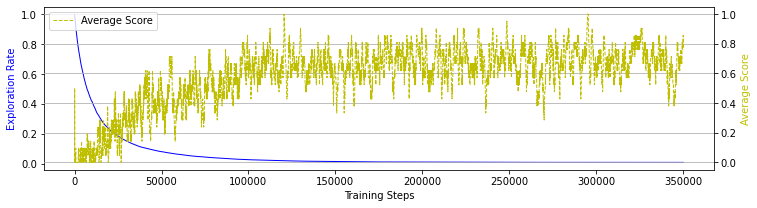

In [5]:
env = gym.make('FrozenLake-v0')

observation_space = env.observation_space.n
action_space = env.action_space.n
agent = Agent(observation_space,  action_space)

scores, exploration_rate_history, steps = [], [], []

for i in range(episodes):
    observation = env.reset()
    done = False
    score = 0.0
    
    while not done:
        action = agent.choice_action(observation)
        next_observation, reward, done, _ = env.step(action)
        agent.learn(observation, action, reward, next_observation)
        observation = next_observation
        score += reward
        step += 1

    steps.append(step)
    scores.append(score)
    exploration_rate_history.append(agent.exploration_rate)
    agent.decrease_exploration_rate()

plot_learning_curve(steps, scores, exploration_rate_history)